# Taller de manejo y visualización de series de tiempo. Sesión 2
El taller aborda los fundamentos para manejo de series de tiempo con Python. El objetivo es otorgar los conocimientos fundamentales al estudiante para el procesamiento, manejo y visualización de bases de datos con series de tiempo en Python. Los códigos de Python se escribirán y ejecutarán en Jupyter Notebook. Se brindará a los estudiantes con las bases de datos para que puedan ejecutar los códigos.

### Sesión: 2 - Miércoles 25 de octubre
### Hora: 10am- 12pm
### Docente: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- <a href='#t1'>1. Obtener bases de datos de la web</a>
     - <a href='#1.1.'>1.1. BCRP Scrapping </a>
     - <a href='#1.2.'>1.2. Importar datos de Yahoo finance </a>
- <a href='#t2'>2. ACP y PACF </a>
     - <a href='#2.1.'>2.1. Autocorrelación </a>
     - <a href='#2.2.'>2.2. Autocorrelación parcial  </a>
- <a href='#t3'>3. Series de tiempo univariadas </a> 
     - <a href='#3.1.'>3.1. Ruido blanco (white noise)</a>
     - <a href='#3.2.'>3.2. Paseo aleatorio (random walk)</a>
     - <a href='#3.3.'>3.3. Prueba de raíz unitaria</a>
     - <a href='#3.3.'>3.4. Estacionariedad</a>
- <a href='#t4'>4. Modelos AR </a>
     - <a href='#4.1.'>4.1. Proceso Autoregresivo (AR) </a>
     - <a href='#4.2.'>4.2. Estimación de procesos autoregresivos (AR)</a>
     - <a href='#4.3.'>4.3. Pronóstico de procesos autoregresivos (AR)</a>
     - <a href='#4.4.'>4.4. Estimar el orden de un proceso AR: PACF </a>
     - <a href='#4.5.'>4.5. Estimar el orden de un proceso AR: Criterios de información </a>
- <a href='#t5'>5. Modelos MA </a>
    - <a href='#5.1.'>5.1. Procesos moving average (MA) </a>
    - <a href='#5.2.'>5.2. Estimación de procesos moving average (MA) </a>
    - <a href='#5.3.'>5.3. Pronóstico de procesos moving average (MA)</a>
    - <a href='#5.4.'>5.4. Estimar el orden de un proceso MA: PACF </a>
    - <a href='#5.5.'>5.5. Estimar el orden de un proceso AR: Criterios de información </a>
    - <a href='#5.6.'>5.6. Equivalencia de un AR(1) con un MA($\infty$) </a>
     
     
     
     
      


#  <a id='t1'> 1. Obtener bases de datos de la web</a>

## <a id='1.1.'> 1.1. BCRP Scrapping </a> 
Se refiere a la práctica de extraer datos del Banco Central de Reserva del Perú (BCRP). El scrapping de BCRP puede ser útil para analistas financieros, economistas y otras partes interesadas que deseen realizar un seguimiento de la economía peruana o realizar investigaciones basadas en datos económicos actualizados. 

Existen múltiples formas de hacer BCRP Scrapping, en esta ocasión primero estamos utilizando la provista por la librería bcrpscrapper cuyo autor es Dereck Amesquita
https://dereckamesquita-bcrp-scrapper-streamlist-bcrp-hxd0fl.streamlit.app/

In [1]:
#!pip install altair
#!pip install requests

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
from pandas_datareader import data

In [3]:
url = "https://raw.githubusercontent.com/dereckamesquita/bcrp-scrapper/main/bcrp_scrapper.py"
response = requests.get(url)

In [4]:
# Importamos la librería bcrp_scrapper de Dereck Amesquita
from bcrp_scrapper import *

Si queremos buscar alguna base de datos de la página de estadísticas del BCRP, utilizamos bcrp_find()

Los argumentos de la función son el nombre de la serie ('Inflación', 'Reservas', 'etc') y la frecuencia ('D', 'M', 'A')

In [5]:
bcrp_find('Inflación', 'M')

,Código,Categoría,Serie,Fecha Inicio,Fecha Fin,Última Actualización,Frecuencia
4349,PN01296PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Bienes,Feb-1992,Jun-2023,06-07-2023,M
4350,PN01297PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Bienes - Alimentos y Be...,Feb-1992,Jun-2023,06-07-2023,M
4351,PN01298PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Bienes - Textiles y Cal...,Feb-1992,Jun-2023,06-07-2023,M
4352,PN01299PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Bienes - Aparatos Elect...,Feb-1992,Jun-2023,06-07-2023,M
4353,PN01300PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Bienes - Resto de Produ...,Feb-1992,Jun-2023,06-07-2023,M
4354,PN01301PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Servicios,Feb-1992,Jun-2023,06-07-2023,M
4355,PN01302PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Servicios - Comidas Fue...,Feb-1992,Jun-2023,06-07-2023,M
4356,PN01303PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Servicios - Educación,Feb-1992,Jun-2023,06-07-2023,M
4357,PN01304PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Servicios - Salud,Feb-1992,Jun-2023,06-07-2023,M
4358,PN01305PM,Índice de precios al consumidor Lima Metropoli...,Inflación Subyacente - Servicios - Alquileres,Feb-1992,Jun-2023,06-07-2023,M


Con la función bcrpscrapper creamos un dataframe, colocamos los códigos de las bases que necesitamos en una lista. 

Utilizamos T para transponerla (de lo contrario saldría una tabla wide en lugar de long)

In [6]:
df = bcrpscrapper(['PN01296PM', 'PN01297PM', 'PN01298PM', 'PN01299PM', 'PN01300PM', 'PN01301PM', 'PN01302PM', 'PN01303PM']).T

In [7]:
display(df.head())

,Inflación Subyacente - Bienes,Inflación Subyacente - Bienes - Alimentos y Bebidas,Inflación Subyacente - Bienes - Textiles y Calzado,Inflación Subyacente - Bienes - Aparatos Electrodomésticos,Inflación Subyacente - Bienes - Resto de Productos Industriales,Inflación Subyacente - Servicios,Inflación Subyacente - Servicios - Comidas Fuera del Hogar,Inflación Subyacente - Servicios - Educación
Periodo,,,,,,,,
1992-02-01,2.194088,2.448909,1.843643,-0.571582,2.258342,3.757522,3.558846,10.580495
1992-03-01,5.924866,8.556717,3.894855,-0.941453,3.958967,8.989502,9.560532,29.728958
1992-04-01,2.342226,1.381586,2.765440,4.606470,3.385033,3.654905,3.154975,2.784360
1992-05-01,2.572653,1.242195,3.287789,10.204088,3.608657,3.461168,3.536849,1.411235
1992-06-01,2.367416,1.134429,3.055222,3.964122,3.592214,3.714429,3.474948,1.921424


In [8]:
# Podemos trabajar con él como cualquier otro dataframe
df.iloc[:,2:]

,Inflación Subyacente - Bienes - Textiles y Calzado,Inflación Subyacente - Bienes - Aparatos Electrodomésticos,Inflación Subyacente - Bienes - Resto de Productos Industriales,Inflación Subyacente - Servicios,Inflación Subyacente - Servicios - Comidas Fuera del Hogar,Inflación Subyacente - Servicios - Educación
Periodo,,,,,,
1992-02-01,1.843643,-0.571582,2.258342,3.757522,3.558846,10.580495
1992-03-01,3.894855,-0.941453,3.958967,8.989502,9.560532,29.728958
1992-04-01,2.765440,4.606470,3.385033,3.654905,3.154975,2.784360
1992-05-01,3.287789,10.204088,3.608657,3.461168,3.536849,1.411235
1992-06-01,3.055222,3.964122,3.592214,3.714429,3.474948,1.921424
...,...,...,...,...,...,...
2023-05-01,0.385350,0.119981,0.175693,0.290291,0.699707,0.068024
2023-06-01,0.341254,-0.061950,0.196106,0.377723,0.731299,0.153018
2023-07-01,0.237528,0.162644,0.067997,0.447371,0.601747,0.079651


In [9]:
# Sacamos algunas estadísticas descriptivas de las series de tiempo
df.describe()

,Inflación Subyacente - Bienes,Inflación Subyacente - Bienes - Alimentos y Bebidas,Inflación Subyacente - Bienes - Textiles y Calzado,Inflación Subyacente - Bienes - Aparatos Electrodomésticos,Inflación Subyacente - Bienes - Resto de Productos Industriales,Inflación Subyacente - Servicios,Inflación Subyacente - Servicios - Comidas Fuera del Hogar,Inflación Subyacente - Servicios - Educación
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.464566,0.494013,0.427627,0.312828,0.473180,0.573289,0.583132,0.767243
std,0.777452,0.929736,0.696170,1.092513,0.815268,0.883910,0.850543,2.118592
min,-0.168546,-0.755792,-0.261100,-1.986517,-0.799217,-0.052695,-0.070318,-0.269976
25%,0.128422,0.113431,0.098504,-0.122753,0.102672,0.145570,0.156237,0.000000
50%,0.251202,0.295046,0.205617,0.098895,0.238335,0.267595,0.369370,0.097704
75%,0.494864,0.560826,0.391683,0.366166,0.538996,0.566993,0.633312,0.526623
max,5.924866,8.556717,4.975013,10.803875,6.366779,8.989502,9.560532,29.728958


Otra manera de realizar BCRP Scrapper aprovechando la interfaz API

Mayor información:
https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api

### Obtener información para una variable

In [10]:
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = 'RD13377DM' 
form_out  = '/json'
period    = '/2003-1/2019-12'
url_final = url_base+cod_var+form_out+period
print(url_final) 

resp = requests.get(url_final)
print(resp)

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD13377DM/json/2003-1/2019-12
<Response [200]>


Si se obtiene una respuesta de [200] entonces corroboramos que el formato existe, cualquier otro número implica un error 

In [11]:
resp_json = resp.json()
print(resp_json) 

{'config': {'title': 'Arribos a los establecimientos de hospedaje según departamentos (número)', 'series': [{'name': 'Arribos a los establecimientos de hospedaje según departamentos (número) - Lima', 'dec': '0'}]}, 'periods': [{'name': 'Ene.2003', 'values': ['825382']}, {'name': 'Feb.2003', 'values': ['779307']}, {'name': 'Mar.2003', 'values': ['836631']}, {'name': 'Abr.2003', 'values': ['798698']}, {'name': 'May.2003', 'values': ['814885']}, {'name': 'Jun.2003', 'values': ['761941']}, {'name': 'Jul.2003', 'values': ['842663']}, {'name': 'Ago.2003', 'values': ['833470']}, {'name': 'Sep.2003', 'values': ['773980']}, {'name': 'Oct.2003', 'values': ['813908']}, {'name': 'Nov.2003', 'values': ['825090']}, {'name': 'Dic.2003', 'values': ['852893']}, {'name': 'Ene.2004', 'values': ['803894']}, {'name': 'Feb.2004', 'values': ['784283']}, {'name': 'Mar.2004', 'values': ['834051']}, {'name': 'Abr.2004', 'values': ['808172']}, {'name': 'May.2004', 'values': ['819079']}, {'name': 'Jun.2004', 'val

In [12]:
for para in resp_json.keys(): # Mediante el siguiente código vemos los parámetros del diccionario
    print(para)

config
periods


In [13]:
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PD04692MD','PD31893DD','PD04637PD', 'PD04638PD', 'PD04647PD', 'PD04648PD', 'PD38026MD', 'PD38027MD', 'PD04696MD', 'PD04701XD', 'PD04702XD', 'PD04703XD', 'PD04704XD', 'PD04705XD', 'PD04718XD', 'PD04719XD', 'PD04720XD', 'PD04709XD', 'PD04708XD', 'PD04721XD']
form_out  = '/json'
period    = '/1997-01-01/2023-01-01'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df_diario = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']
    
    value = []
    dates = []
    
    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(float(aux_val[0]))
    
    dict_aux = {'Fecha' : dates, 
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])

    
    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df_diario    = pd.concat([df_diario, df_aux], axis=1)

display(df_diario)

,"Tasas de interés - Interbancaria, S/",Tasas de interés - Rendimiento del Bono del gobierno peruano a 10 años (en S/),Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Tipo de cambio - TC Interbancario (S/ por US$) - Venta,Tipo de cambio - TC Euro (S/ por Euro) - Compra,Tipo de cambio - TC Euro (S/ por Euro) - Venta,Indicadores bursátiles - Índice General Bursátil BVL (índice),Indicadores bursátiles - Índice Selectivo Bursátil BVL (índice),Indicadores bursátiles - Monto negociado en acciones (millones S/) - Promedio diario,"Cotizaciones internacionales - Cobre (Londres, cUS$ por libras)","Cotizaciones internacionales - Plata (H.Harman, US$ por onzas troy)","Cotizaciones internacionales - Zinc (Londres, cUS$ por libras)","Cotizaciones internacionales - Oro (Londres, US$ por onzas troy)","Cotizaciones internacionales - Petróleo (West Texas Intermediate, US$ por barriles)",Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 5 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 10 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 30 años (%),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG Perú (pbs),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG America Latina (pbs),Bolsas (índices) - Dow Jones (var%)
Fecha,,,,,,,,,,,,,,,,,,,,
1997-01-01,18.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-04,14.650000,NaN,2.657000,2.660000,NaN,NaN,NaN,NaN,32.817459,108.952887,5.010,58.014464,350.00,20.28,NaN,6.877,7.070,NaN,NaN,0.420000
1997-01-05,17.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.730,NaN,341.10,19.91,NaN,6.682,6.918,NaN,NaN,-0.460000
1997-01-07,8.743295,NaN,2.649000,2.653000,NaN,NaN,NaN,NaN,44.205904,114.441355,4.650,64.228680,334.30,20.12,NaN,6.444,6.743,NaN,NaN,0.650000
1997-01-08,16.278077,NaN,2.649000,2.653000,NaN,NaN,NaN,NaN,37.597922,106.095255,4.470,70.715050,325.20,20.28,NaN,6.184,6.456,NaN,NaN,-0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,7.500000,7.94,3.816833,3.820667,3.886,4.074,21168.78,29649.25,0.875255,376.867221,23.788,135.397322,1797.40,79.57,3.8569,3.743,3.822,193.0,441.0,0.000000
2022-12-27,7.510000,7.93,3.817667,3.820000,3.978,4.182,21347.23,30042.33,45.910123,376.867221,23.788,135.397322,1797.40,80.15,3.9449,3.849,3.934,191.0,437.0,0.112726
2022-12-28,7.500000,7.97,3.808833,3.811333,3.888,4.152,21302.55,29965.07,260.870128,383.330912,23.547,138.617828,1803.35,78.06,3.9732,3.886,3.975,190.0,436.0,-1.103073


In [14]:
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PD37940PQ', 'PN39352BQ', 'PN02516AQ', 'PN02529AQ', 'PN02530AQ', 'PN02531AQ','PN02536AQ', 'PN02537AQ', 'RD14428DQ', 'RD14378DQ']
form_out  = '/json'
period    = '/1992-T1/2019-T3'

df_trimestral= pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']
    
    value = []
    dates = []
    
    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(float(aux_val[0]))
    
    dict_aux = {'Fecha' : dates, 
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)
    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df_trimestral    = pd.concat([df_trimestral, df_aux], axis=1)

display(df_trimestral)

,Índice de precios de inmuebles - Índice de precios hedónicos de inmuebles,Términos de intercambio de comercio exterior (índice 2007 = 100) - Términos de Intercambio,Producto bruto interno (índice 2007 = 100) - PBI Global,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Público,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna,Producto bruto interno por tipo de gasto (millones S/ 2007) - Exportaciones,Producto bruto interno por tipo de gasto (millones S/ 2007) - Importaciones,Venta de energía eléctrica por departamento - Total (gwh),Producción de electricidad por departamento - Total (gwh)
Fecha,,,,,,,,,,
T4.07,37.439966,NaN,106.368669,49355.000000,9062.000000,19958.605515,26528.749512,19891.058026,6464.702474,7810.439752
T1.08,38.218694,NaN,101.087441,50198.747000,8446.000000,18472.213182,24984.490277,21309.082535,6628.057703,8021.207739
T2.08,43.810833,NaN,111.491856,53698.142000,8409.000000,24525.168775,25503.725647,23028.121700,6760.948631,8070.605873
T3.08,49.390820,NaN,110.641188,53716.922000,8923.000000,22355.630732,27640.704754,24208.224233,6809.490439,8142.209647
T4.08,50.482453,NaN,113.255841,51822.750000,9448.000000,25504.346607,27366.378643,23623.726499,6804.833241,8229.083024
...,...,...,...,...,...,...,...,...,...,...
T3.06,NaN,NaN,91.095231,45099.679108,8081.896069,10484.386900,24017.825334,14877.518346,5579.537963,6829.039864
T4.06,NaN,NaN,95.462662,45031.080697,9576.017279,13728.996754,25119.239326,17158.471872,5815.984680,7137.142592
T1.07,NaN,NaN,91.780700,46181.000000,7999.000000,14604.264160,21907.711219,17337.857379,5956.440845,7285.946164


In [15]:
# Sacamos algunas estadísticas descriptivas
df_trimestral.describe()

,Índice de precios de inmuebles - Índice de precios hedónicos de inmuebles,Términos de intercambio de comercio exterior (índice 2007 = 100) - Términos de Intercambio,Producto bruto interno (índice 2007 = 100) - PBI Global,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Público,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Inversión Bruta Interna,Producto bruto interno por tipo de gasto (millones S/ 2007) - Exportaciones,Producto bruto interno por tipo de gasto (millones S/ 2007) - Importaciones,Venta de energía eléctrica por departamento - Total (gwh),Producción de electricidad por departamento - Total (gwh)
count,49.000000,32.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,57.000000,60.000000
mean,87.164713,96.903628,102.895563,52392.112839,9130.869125,17861.504687,22095.976271,19242.985318,7211.144853,8461.030220
std,23.618922,6.602352,38.683853,19173.486282,3882.204430,9568.857890,8929.637493,9638.642265,2051.472598,2671.944072
min,37.439966,86.487599,48.119629,26753.433712,3619.429369,5663.858711,6621.564948,5625.379618,3639.758731,4309.162845
25%,64.873512,92.790171,68.373565,36029.418270,5969.810217,8636.510642,14057.897230,10696.546769,5473.842485,6558.216349
50%,102.227632,95.517843,91.437965,44483.253063,7943.500000,14531.447184,23505.322705,14892.888738,6998.088731,8194.442417
75%,105.518028,100.115900,139.329868,69786.735822,11829.241583,28643.015348,28467.811840,30507.385481,8913.739713,10672.931104
max,111.399109,111.024744,180.022946,91038.171497,20204.447683,33267.151599,39247.887059,34958.394863,11012.490154,13171.554974


In [16]:
bcrp_find('PBI', 'M')

,Código,Categoría,Serie,Fecha Inicio,Fecha Fin,Última Actualización,Frecuencia
4454,PD38048AM,Expectativas macroeconómicas\t - (3 se...,Expectativa de PBI a 12 meses,Dic-2006,Jun-2023,06-07-2023,M
5021,PN01728AM,Producto bruto interno y demanda interna (vari...,PBI,Ene-2004,May-2023,20-07-2023,M
5024,PN01731AM,Producto bruto interno y demanda interna (vari...,PBI Desestacionalizado - Var% mensual,Feb-2003,May-2023,20-07-2023,M
5025,PN38082AM,Producto bruto interno y demanda interna (vari...,PBI Desestacionalizado - Var% promedio móvil 3...,Abr-2003,May-2023,20-07-2023,M
5043,PN01770AM,Producto bruto interno y demanda interna (índi...,PBI,Ene-2003,May-2023,20-07-2023,M
5046,PN01773AM,Producto bruto interno y demanda interna (índi...,PBI Desestacionalizado - mensual,Ene-2003,May-2023,20-07-2023,M
5047,PN38081AM,Producto bruto interno y demanda interna (índi...,PBI Desestacionalizado - Promedio móvil 3 meses,Mar-2003,May-2023,20-07-2023,M
5576,PN39524FM,Operaciones del sector público no financiero (...,Resultado económico (Acumulado 12 meses - Porc...,Ene-2007,Jun-2023,13-07-2023,M


In [17]:
# PBI = bcrpscrapper('PN01770AM').T  # PBI no ajustado por la estacionalidad
# lo descartamos por tener una comportamiento no deseado

In [18]:
PBI_sa = bcrpscrapper('PN01773AM').T # PBI ajustado por la estacionalidad
PBI_sa

,PBI Desestacionalizado - mensual
Periodo,
2003-01-01,74.997752
2003-02-01,75.879351
2003-03-01,76.066410
2003-04-01,76.688140
2003-05-01,76.860589
...,...
2023-04-01,177.081168
2023-05-01,173.954168
2023-06-01,177.300130


In [19]:
PBI_sa[PBI_sa['PBI Desestacionalizado - mensual'] == PBI_sa.max()[0]] # En qué momento alcanzó su máximo, respecto al índice de 2007

,PBI Desestacionalizado - mensual
Periodo,
2022-09-01,179.482299


## <a id='1.2.'> 1.2. Importar datos de Yahoo Finance </a> 

In [20]:
!pip install yfinance
import yfinance as yf

In [21]:
apple = yf.download("AAPL", start="2002-01-01", end="2021-12-31")

[*********************100%%**********************]  1 of 1 completed


In [22]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.353160,529496800
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.357404,612007200
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.359071,409976000
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.347098,444584000
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.342701,450038400


In [23]:
apple = apple['Close']

#  <a id='t2'> 2. ACF y PACF</a>

## <a id='2.1.'> 2.1. Autocorrelación (ACF) </a>
La autocorrelación mide la relación entre los valores de una serie de tiempo con sus rezagos. Es decir, con sus valores pasados en el tiempo. Una autocorrelación positiva sugiere una relación positiva entre los valores pasados y presentes, mientras que una autocorrelación negativa sugiere una relación negativa. Esta es medida en una escala de -1 a 1.

Cuando una serie de tiempo tiene un componente autorregresivo (AR), la ACF suele tener la forma de una "escalera" que decae lentamente.
En caso la serie de tiempo no tenga componente AR, entonces cae inmediatamente 

Utilizaremos la función plot_acf() del módulo tsaplots para realizar el ploteo de la ACF

Esta función incluye líneas de confianza en el gráfico para ayudar a identificar si los valores de autocorrelación son estadísticamente significativos. Estas líneas de confianza a menudo se basan en pruebas de hipótesis y ayudan a determinar si la autocorrelación en un rezago específico es significativa 

In [24]:
from statsmodels.graphics import tsaplots

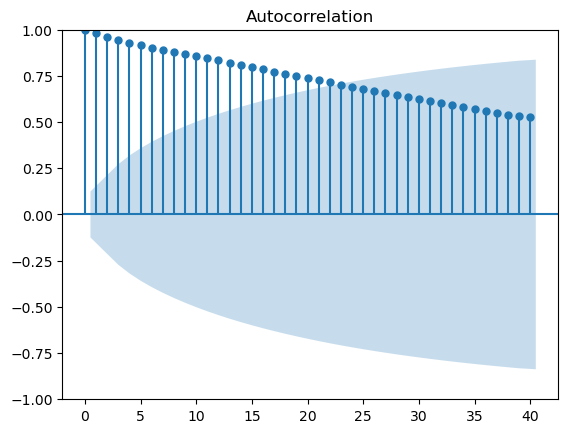

In [25]:
fig = tsaplots.plot_acf(PBI_sa, lags = 40)

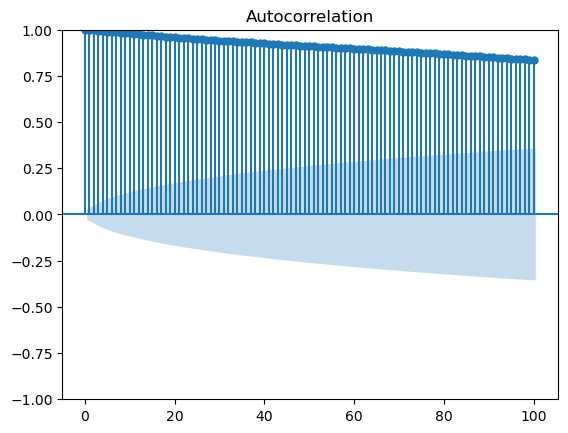

In [26]:
fig = tsaplots.plot_acf(apple, lags = 100)

## <a id='2.2.'> 2.2. Autocorrelación parcial (PACF) </a>
La autocorrelación parcial mide la relación entre los valores de una serie de tiempo con sus rezagos, tomando en cuenta y eliminando la influencia de los rezagos intermedios. Esto ayuda a identificar la correlación directa entre los valores en diferentes momentos en el tiempo, sin la influencia de los rezagos intermedios.

Cuando una serie tiene un componente AR, la PACF tiene la forma de una "escalera" que se quiebra intempestivamente. El quiebre indica la cantidad de rezagos AR que se deben considerar para modelar la serie de tiempo.

Cuando la serie tiene un componente MA, la PACF tiene la forma de una "escalera" que cae suavemente.

Utilizaremos la función plot_pacf() para graficar la PACF. Esta gráfica incluye líneas de confianza en el gráfico que ayuda a identificar si los valores de autocorrelación parcial son estadísticamente significativos o no.

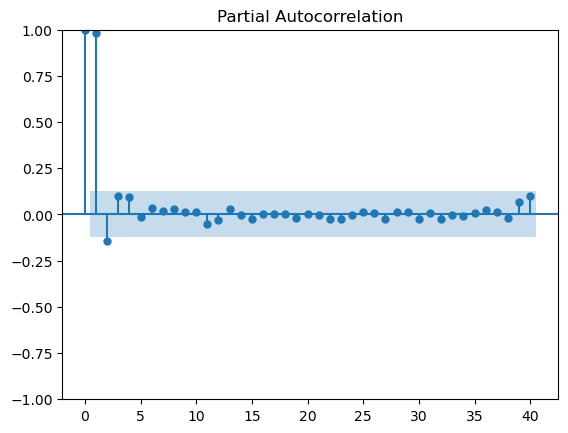

In [27]:
fig = tsaplots.plot_pacf(PBI_sa, lags = 40)

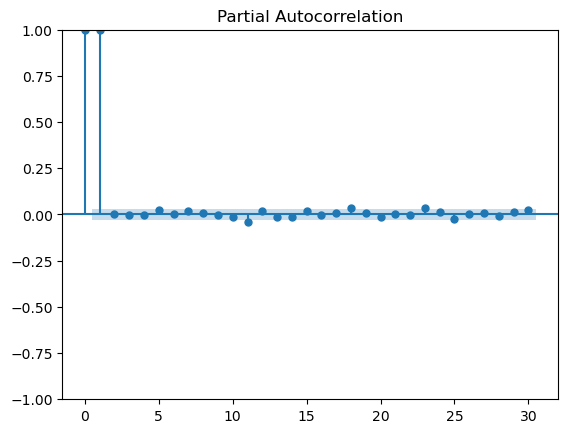

In [28]:
fig = tsaplots.plot_pacf(apple, lags = 30)

### Resumen de cómo ver el orden de un modelo:

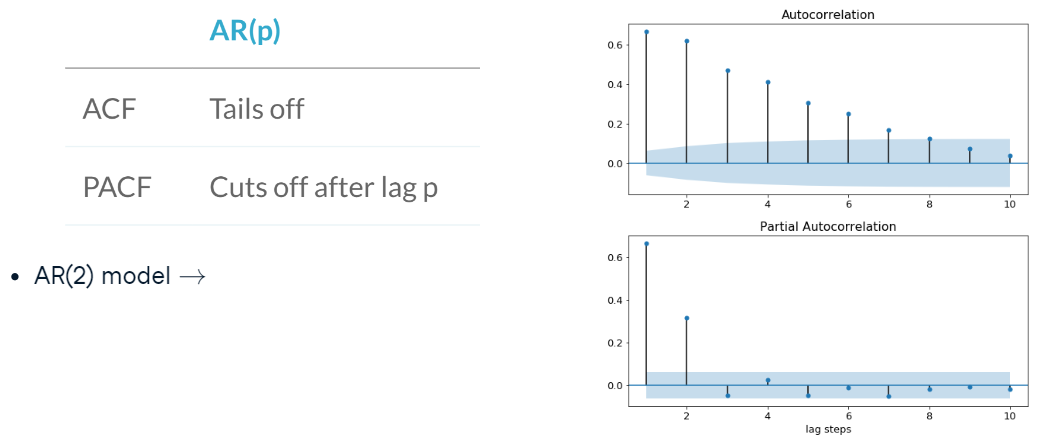

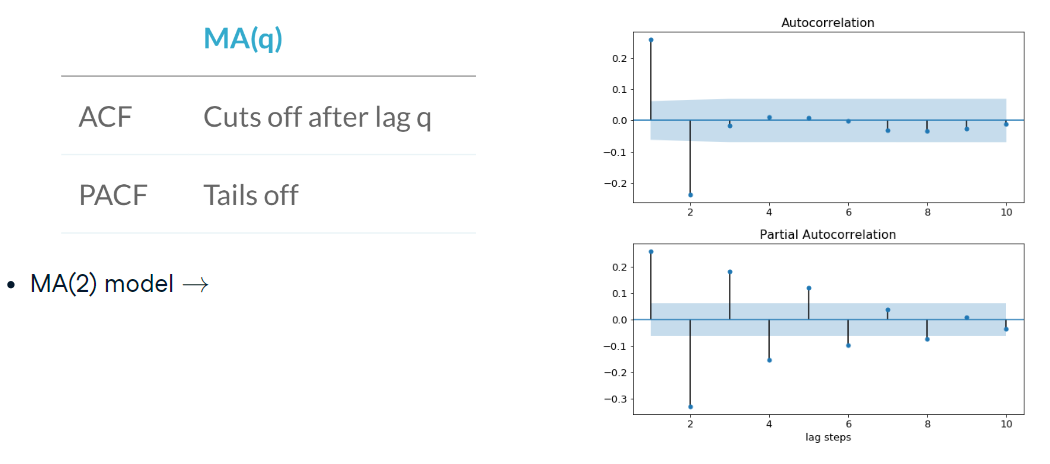

#  <a id='t3'> 3. Series de tiempo univariadas </a>

In [29]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf

## <a id='3.1.'> 3.1. Ruido blanco (white noise) </a>
Un ruido blanco es una secuencia de valores independientes e idénticamente distribuidos (i.i.d.) que siguen usualmente con una distribución normal (gaussiana). El ruido blanco en series de tiempo se utiliza a menudo para representar la variabilidad aleatoria no explicada en un conjunto de datos, es decir, son usados como término de error, y es un componente común en la modelización y el análisis de series temporales.  

In [30]:
noise = np.random.normal(loc = 0, scale = 1, size=500) # Indicamos media 0 y varianza 1

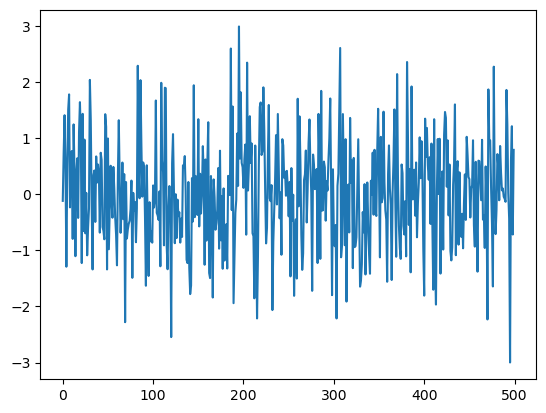

In [31]:
plt.plot(noise)

In [32]:
print('mean: ', np.mean(noise))
print('std: ', np.std(noise))

mean:  0.019364510565614976
std:  0.955896530538446


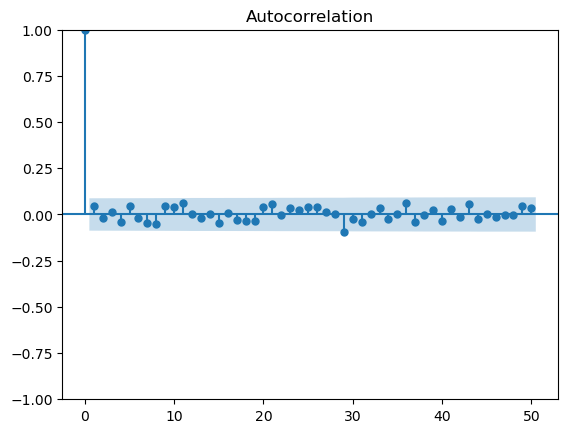

In [33]:
tsaplots.plot_acf(noise, lags = 50)
plt.show()

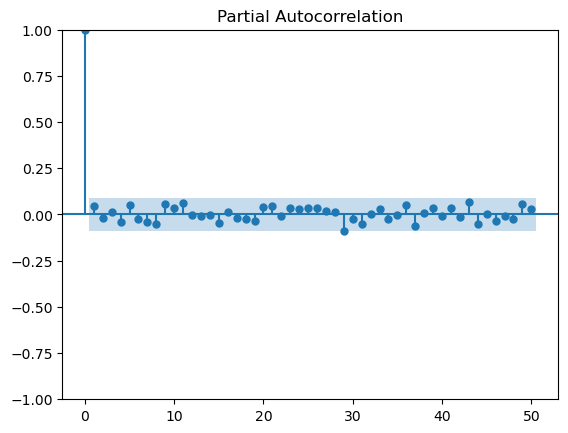

In [34]:
tsaplots.plot_pacf(noise, lags = 50)
plt.show()


In [35]:
acf(noise)

array([ 1.00000000e+00,  4.37891268e-02, -1.79515625e-02,  1.35084798e-02,
       -3.88293465e-02,  4.57200008e-02, -1.93561304e-02, -4.71786272e-02,
       -4.96933158e-02,  4.75390798e-02,  4.31382555e-02,  6.32591204e-02,
        1.71529996e-03, -1.81694133e-02,  3.19251547e-03, -4.44712341e-02,
        1.03400820e-02, -2.84722678e-02, -3.72224846e-02, -3.27546998e-02,
        4.05804264e-02,  5.87155625e-02, -2.44915414e-04,  3.50020844e-02,
        2.31900736e-02,  3.97831199e-02,  4.18434299e-02])

In [36]:
pacf(noise)

array([ 1.        ,  0.04387688, -0.01998732,  0.01530921, -0.04090379,
        0.05058017, -0.02609572, -0.04271246, -0.05080453,  0.05664913,
        0.03476912,  0.0642017 , -0.00514893, -0.01016731, -0.00433145,
       -0.04772886,  0.01281015, -0.02233067, -0.02595314, -0.03565005,
        0.04262024,  0.04708865, -0.00753144,  0.03466652,  0.03065949,
        0.03789621,  0.03838684])

## <a id='3.2.'> 3.2. Paseo aleatorio (random walk) </a>
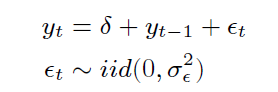

En econometría, el término "Random Walk" se refiere a un modelo estadístico que describe una serie de tiempo en la que cada observación es igual a la observación anterior más un término de error aleatorio, es decir, un ruido blanco. En este modelo, no se incluyen otras variables explicativas o determinísticas que expliquen los cambios en la serie de tiempo, y los cambios en la serie se deben únicamente a la aleatoriedad.

Sus principales características son:
1. No hay tendencia determinística: No se incluyen variables determinísticas (como tendencias lineales o estacionales) que expliquen los cambios en la serie de tiempo. Cualquier cambio en la serie se atribuye al término de error aleatorio.

2. Independencia: Cada cambio en la serie es independiente de los cambios anteriores. No hay autocorrelación en los errores.

3. No estacionario: Es un proceso no estacionario, lo que significa que la media y la varianza de la serie cambian con el tiempo. Esto lo diferencia de los procesos estacionarios donde la media y la varianza son constantes.

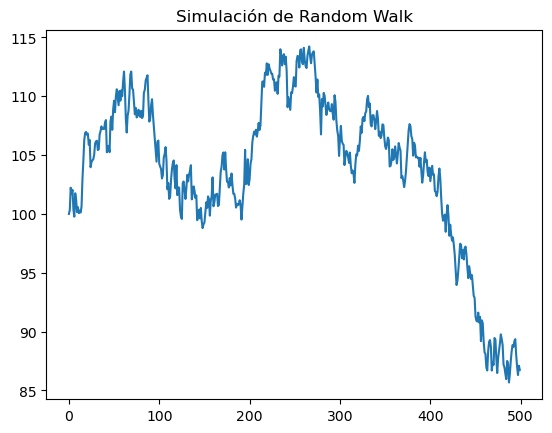

In [37]:
# Generar un Random Walk para modelar los precios de las acciones bursátiles

# Genera 500 pasos aleatorios con media=0 y desviación estándar=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Poner el primer elemento a 0
steps[0]=0

# Simular los precios de las acciones, P con un precio inicial de 100 (modelo con drift = 100)
P = 100 + np.cumsum(steps)

# Graficamos la simulación de los precios de las acciones bursátiles
plt.plot(P)
plt.title("Simulación de Random Walk")
plt.show()

Cada vez que hagamos click en "Run" se simulará un random walk distinto

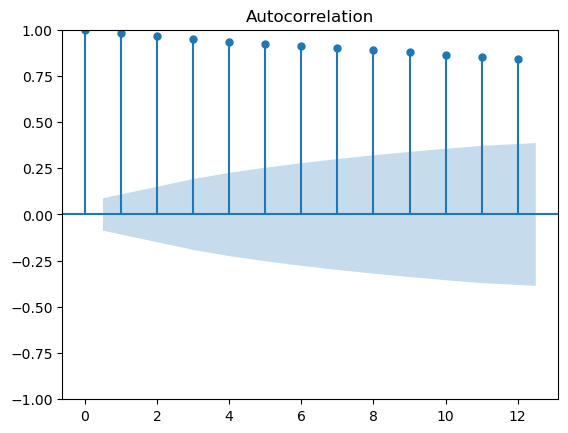

In [38]:
tsaplots.plot_acf(P, lags = 12)
plt.show()

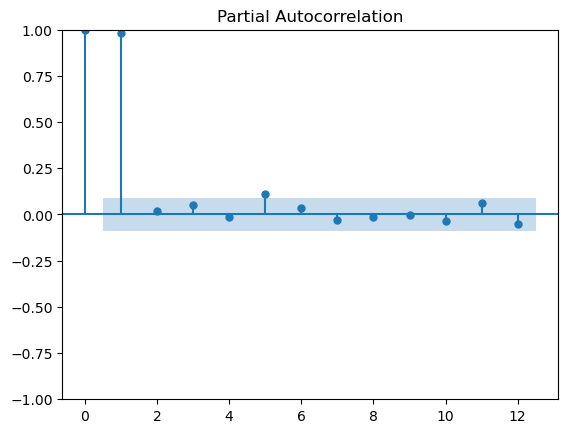

In [39]:
tsaplots.plot_pacf(P, lags = 12)
plt.show()

## <a id='3.3.'> 3.3. Prueba de raíz unitaria </a>

Una prueba de raíz unitaria evalúa si una serie temporal muestra una tendencia a largo plazo o si es estacionaria en torno a una media constante. Si se encuentra evidencia de raíz unitaria, se pueden aplicar técnicas de diferenciación para eliminar la tendencia y hacer que los datos sean estacionarios

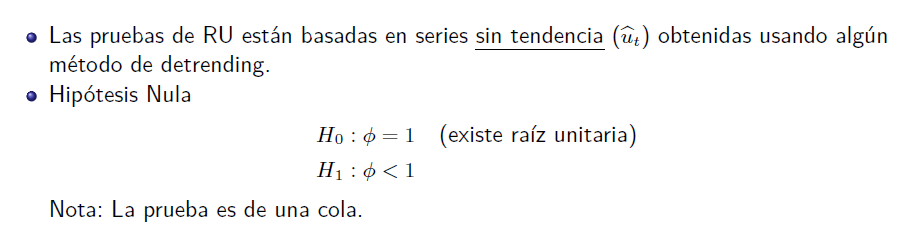
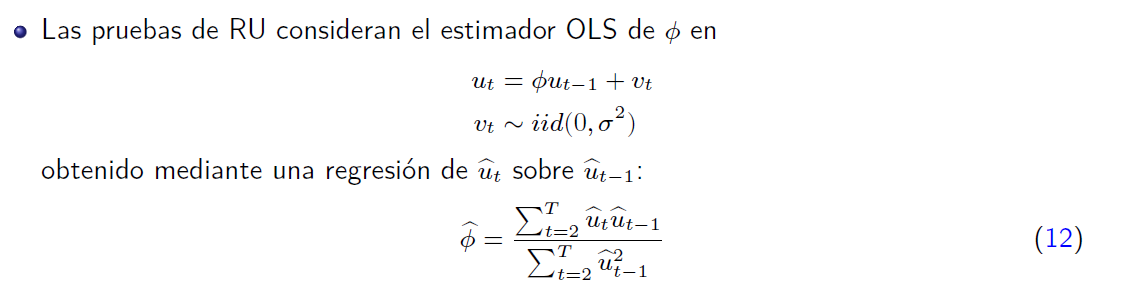

### Vamos a aprender a hacer la prueba de Dickey-Fuller aumentada. No obstante, para ello usaremos la siguiente especificación a partir del modelo en (3)
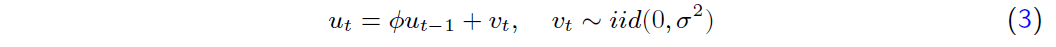
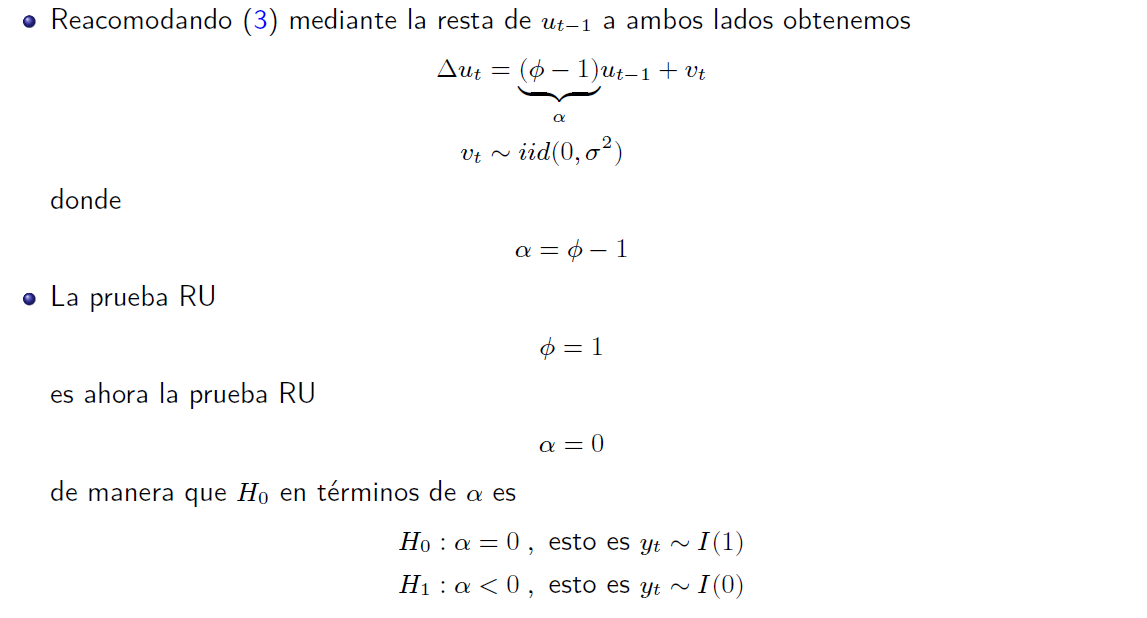

### Para nuestro modelo de precios de las acciones bursátiles, entonces, estaríamos testeando: 
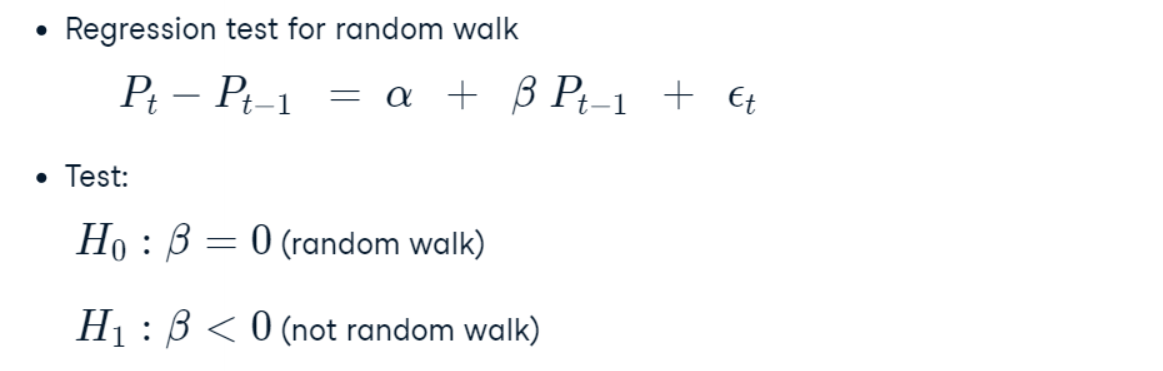

In [40]:
# ImportaMOS el módulo adfuller de statsmodels
from statsmodels.tsa.stattools import adfuller

# Ejecutamos la prueba ADF sobre la serie de precios e imprimimos los resultados
results = adfuller(P)
print(results)

(-0.034490893244690964, 0.955585055642439, 4, 495, {'1%': -3.4436298692815304, '5%': -2.867396599893435, '10%': -2.5698893429241916}, 1360.1713022182398)


In [41]:
# Imprimimos los resultados
print(' H0: Raíz unitaria', '\n', 'H1: No hay raíz unitaria')
print('El t-statistic del test en P es: ' + str(results[0]) + ' y un valor crítico de '+ str(results[4]['5%']))
print('El p-value del test en P es: ' + str(results[1]))
print('Dado que el t-estadístico calculado no supera en valor absoluto el valor crítico al 5%, no rechazamos H0. Hay raíz unitaria')
print('Dado que el p-value no es próximo a cero, no rechazamos H0. Hay raíz unitaria')

 H0: Raíz unitaria 
 H1: No hay raíz unitaria
El t-statistic del test en P es: -0.034490893244690964 y un valor crítico de -2.867396599893435
El p-value del test en P es: 0.955585055642439
Dado que el t-estadístico calculado no supera en valor absoluto el valor crítico al 5%, no rechazamos H0. Hay raíz unitaria
Dado que el p-value no es próximo a cero, no rechazamos H0. Hay raíz unitaria


## <a id='3.4.'> 3.4. Estacionariedad </a>

Utilizaremos una base de datos de los precios de las acciones de Amazon, descargadas de Yahoo Finance con la librería mostrada al inicio de la clase

In [42]:
amazon = yf.download("AMZN", start="2002-01-01", end="2022-12-31")

[*********************100%%**********************]  1 of 1 completed


In [43]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5.287000e+03
mean,37.425930,37.860883,36.943025,37.408017,37.408017,1.198941e+08
std,50.654984,51.247480,49.986565,50.610180,50.610180,9.560508e+07
min,0.480000,0.492500,0.451500,0.456500,0.456500,1.762600e+07
25%,2.580750,2.636250,2.533500,2.579500,2.579500,6.603800e+07
50%,11.329500,11.534000,11.230000,11.367500,11.367500,9.869000e+07
75%,50.298750,50.501251,49.880501,50.148500,50.148500,1.443110e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


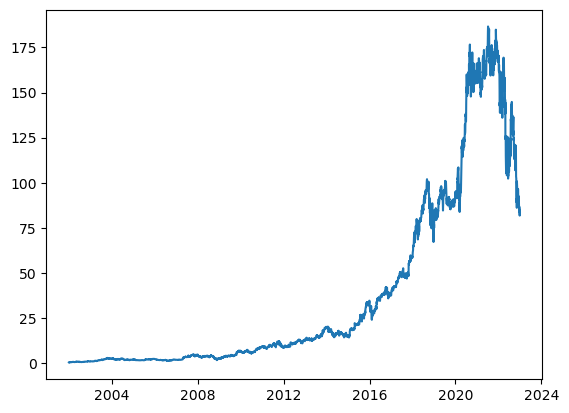

In [44]:
plt.plot(amazon['Adj Close']) # Serie en niveles

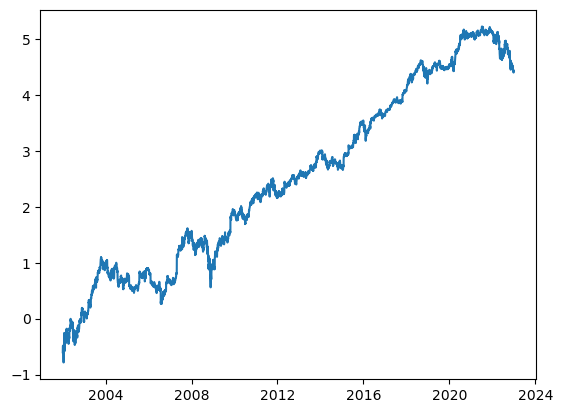

In [45]:
plt.plot(np.log(amazon['Adj Close'])) # Serie en logatirmos

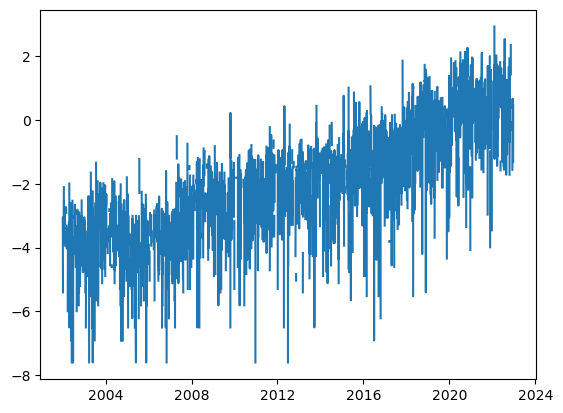

In [46]:
plt.plot(np.log(amazon['Adj Close'].diff())) # Serie en diferencias

In [47]:
# Ejecutamos la prueba ADF sobre la serie en niveles
results_1 = adfuller(amazon['Adj Close'])
print(results_1)

(-0.8088222707271133, 0.816516846101847, 33, 5253, {'1%': -3.4315954784667735, '5%': -2.8620903726378546, '10%': -2.567062963019618}, 18038.15368612288)


In [48]:
# Imprimimos los resultados
print(' H0: Raíz unitaria', '\n', 'H1: No hay raíz unitaria')
print('El t-statistic del test en Amazon es: ' + str(results[0]) + ' y un valor crítico de '+ str(results[4]['5%']))
print('El p-value del test en Amazon es: ' + str(results[1]))
print('Dado que el t-estadístico calculado no supera en valor absoluto el valor crítico al 5%, no rechazamos H0. Hay raíz unitaria')
print('Dado que el p-value no es próximo a cero, no rechazamos H0. Hay raíz unitaria')

 H0: Raíz unitaria 
 H1: No hay raíz unitaria
El t-statistic del test en Amazon es: -0.034490893244690964 y un valor crítico de -2.867396599893435
El p-value del test en Amazon es: 0.955585055642439
Dado que el t-estadístico calculado no supera en valor absoluto el valor crítico al 5%, no rechazamos H0. Hay raíz unitaria
Dado que el p-value no es próximo a cero, no rechazamos H0. Hay raíz unitaria


In [49]:
# Ejecutamos la prueba ADF para la serie en logaritmos
results_2 = adfuller(np.log(amazon['Adj Close']))
print(results_2)

(-1.4466894783587143, 0.559699418712842, 2, 5284, {'1%': -3.431588167979747, '5%': -2.862087142831372, '10%': -2.567061243679948}, -23694.636238285173)


In [50]:
# Imprimimos el p-value
print(' H0: Raíz unitaria', '\n', 'H1: No hay raíz unitaria')
print('El t-statistic del test en Amazon es: ' + str(results[0]) + ' y un valor crítico de '+ str(results[4]['5%']))
print('El p-value del test en Amazon es: ' + str(results[1]))
print('Dado que el t-estadístico calculado no supera en valor absoluto el valor crítico al 5%, no rechazamos H0. Hay raíz unitaria')
print('Dado que el p-value no es próximo a cero, no rechazamos H0. Hay raíz unitaria')

 H0: Raíz unitaria 
 H1: No hay raíz unitaria
El t-statistic del test en Amazon es: -0.034490893244690964 y un valor crítico de -2.867396599893435
El p-value del test en Amazon es: 0.955585055642439
Dado que el t-estadístico calculado no supera en valor absoluto el valor crítico al 5%, no rechazamos H0. Hay raíz unitaria
Dado que el p-value no es próximo a cero, no rechazamos H0. Hay raíz unitaria


In [51]:
# Ejecutamos la prueba ADF para la serie en diferencias
results_3 = adfuller(amazon['Adj Close'].diff().fillna(0))
print(results_3)

(-12.825036235512917, 6.039148729179155e-24, 33, 5253, {'1%': -3.4315954784667735, '5%': -2.8620903726378546, '10%': -2.567062963019618}, 18028.91970902489)


In [52]:
# Imprimimos el p-value
print(' H0: Raíz unitaria', '\n', 'H1: No hay raíz unitaria')
print('El t-statistic del test en Amazon es: ' + str(results[0]) + ' y un valor crítico de '+ str(results[4]['5%']))
print('El p-value del test en Amazon es: ' + str(results[1]))
print('El t-estadístico calculado supera en valor absoluto el valor crítico al 5%, rechazamos H0. No hay raíz unitaria')
print('El p-value es próximo a cero, rechazamos H0. No hay raíz unitaria.')

 H0: Raíz unitaria 
 H1: No hay raíz unitaria
El t-statistic del test en Amazon es: -0.034490893244690964 y un valor crítico de -2.867396599893435
El p-value del test en Amazon es: 0.955585055642439
El t-estadístico calculado supera en valor absoluto el valor crítico al 5%, rechazamos H0. No hay raíz unitaria
El p-value es próximo a cero, rechazamos H0. No hay raíz unitaria.


Observamos que tanto la serie en niveles como en logaritmos presentan raíz unitaria. No obstante, la serie en diferencias ya no es estacionaria. Por tanto, si queremos pasar de una serie no estacionaria a no estacionaria, no basta con sacar los logaritmos a la serie, debemos diferenciarla. 

# <a id='4.'> 4. Modelos AR </a>

## <a id='4.1.'> 4.1. Procesos autoregresivos (AR) </a>
 En un modelo AR, se asume que el valor actual de una serie temporal depende linealmente de sus valores pasados y de un término de error estocástico. 
 
Entre sus características clave:
1. Dependencia temporal: En un modelo AR(p), donde "p" es el orden del modelo, el valor actual de la serie temporal depende de sus "p" valores anteriores, ponderados por coeficientes autorregresivos. Esto implica que los modelos AR capturan la memoria a corto plazo de la serie.
2. Los coeficientes autorregresivos ($\phi_1$, ... , $\phi_p$) son parámetros que indican cuánta influencia tienen los valores pasados en el valor actual. Su valor va de $-1<\phi<1$ , pero no llegan a ser exactamente la unidad, dado que en ese caso estaríamos lidiando con un random walk (un proceso no estacionario) Los coeficientes deben estimarse a partir de los datos.
3. El orden del modelo. Este es usualmente elegido gráficamente mediante el análisis visual de los ACF y PACF, o a través de los criterios de información

Dada la siguiente especificación
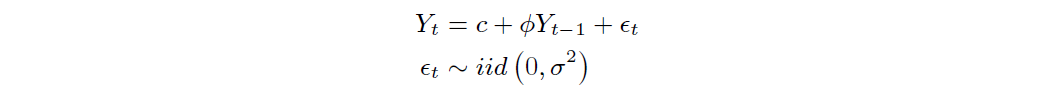
Dependiendo del valor de $\phi$
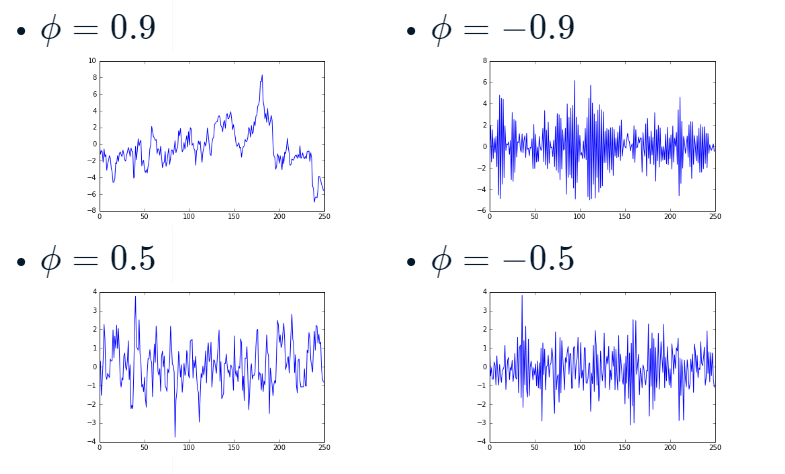
Mientras más cercano es $\phi$ a 1, más parece el proceso un random walk, mientras más cercano está a 0, más parece un ruido blanco.

Sus respectivas ACFs serían
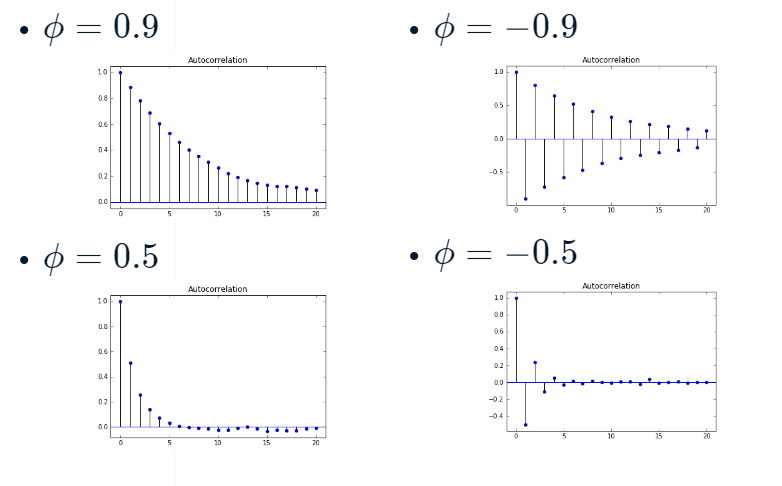
donde los AR con $\phi$ negativo muestran una autocorrelación positiva, seguida de una negativa, e intercalando constantemente 

Asimismo, los modelos $AR(p)$ de mayor orden $p$ vendrían representados por
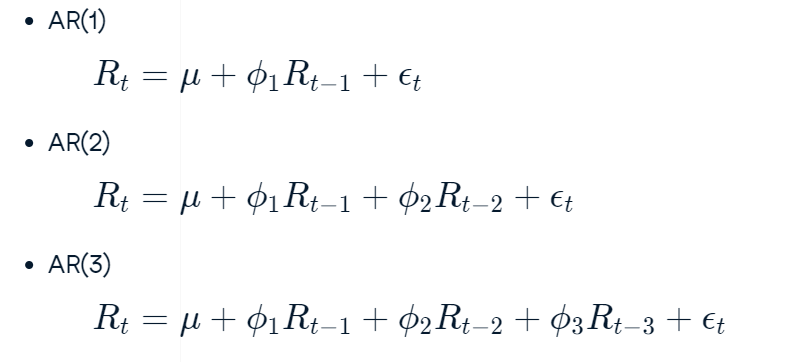
y en general, un $AR(p)$
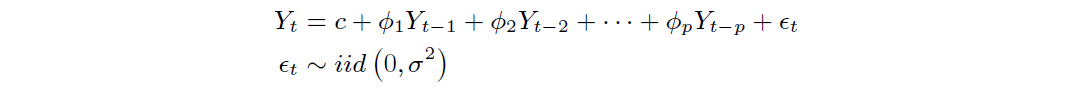

### Simular un modelo AR
Simularemos y trazaremos algunas series temporales AR(1), cada una con un parámetro diferente, utilizando el módulo arima_process de statsmodels. Importamos ArmaProcess y le añadimos dos arrays, uno con el componente AR y otro con el componente MA, que por el momento dejamos en 1 y trataremos a detalle en la sección 5.

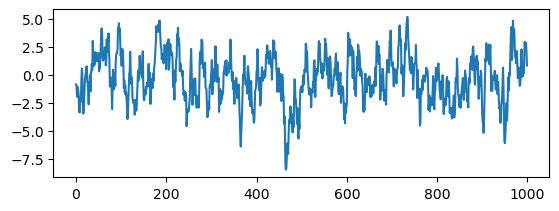

In [53]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

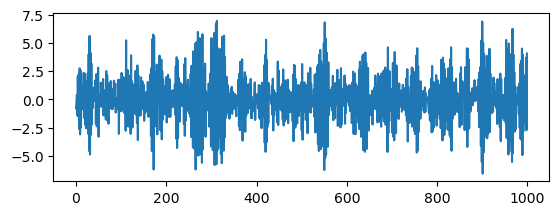

In [54]:
# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, +0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

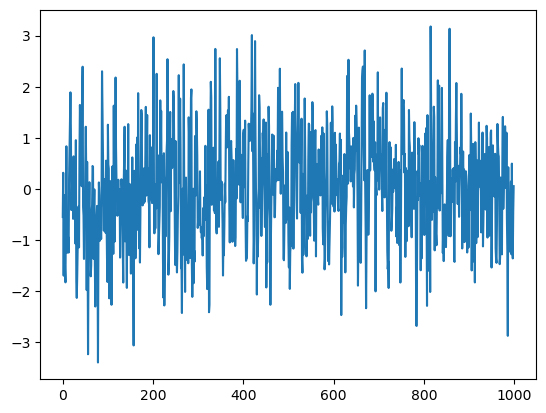

In [55]:
# Plot 3: AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)

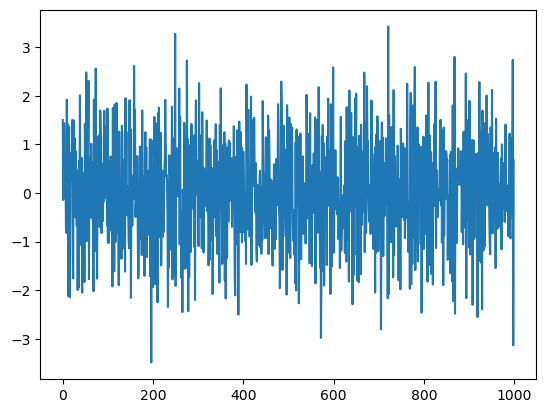

In [56]:
# Plot 4: AR parameter = -0.3
ar4 = np.array([1, 0.3])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
plt.plot(simulated_data_4)

### Comparar el ACF de los procesos AR

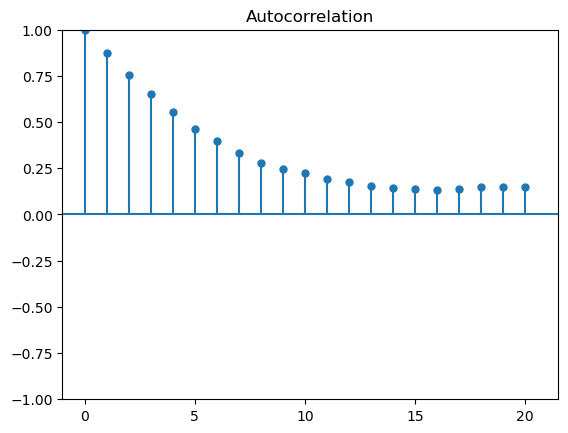

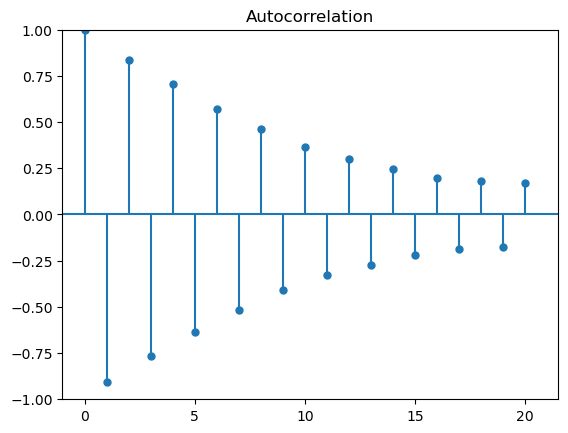

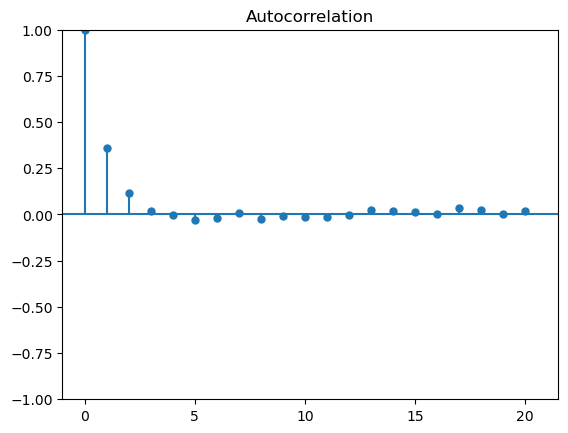

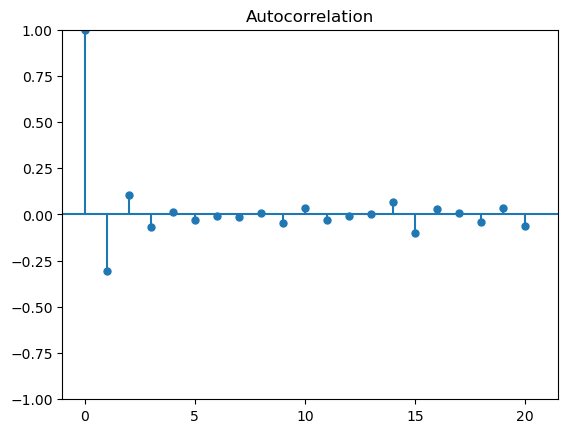

In [57]:
# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

# Plot 4: AR parameter = -0.3
plot_acf(simulated_data_4, alpha=1, lags=20)
plt.show()

## <a id='4.2.'> 4.2. Estimación de procesos autoregresivos (AR) </a>

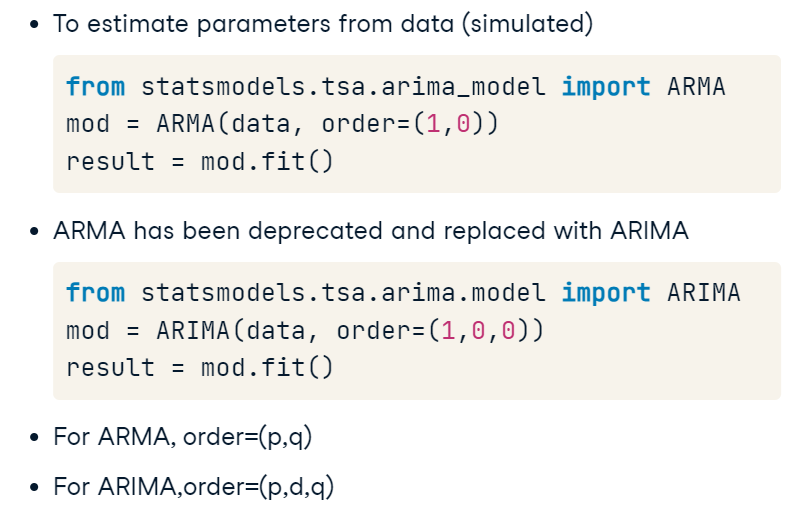

In [58]:
# Primero transformamos a dataframes los arrays de las variables simuladas
simulated_data_1 = pd.DataFrame(simulated_data_1)
simulated_data_1.columns = ['Data']

simulated_data_2 = pd.DataFrame(simulated_data_2)
simulated_data_2.columns = ['Data']

simulated_data_3 = pd.DataFrame(simulated_data_3)
simulated_data_3.columns = ['Data']

simulated_data_4 = pd.DataFrame(simulated_data_4)
simulated_data_4.columns = ['Data']

In [59]:
# Importa el módulo ARIMA de statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

# Ajusta un modelo AR(1) a los primeros datos simulados
mod = ARIMA(simulated_data_1, order=(1, 0, 0))
res = mod.fit()

# Imprime información de resumen sobre el ajuste
print(res.summary())

# Imprime la estimación para phi
print("Cuando el valor verdadero de phi=0.9, la estimación de phi es:")
print(res.params[1])


                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1456.314
Date:                Wed, 25 Oct 2023   AIC                           2918.629
Time:                        19:37:42   BIC                           2933.352
Sample:                             0   HQIC                          2924.225
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2736      0.254     -1.075      0.282      -0.772       0.225
ar.L1          0.8706      0.016     54.678      0.000       0.839       0.902
sigma2         1.0760      0.049     21.999      0.0

In [60]:
# Ajusta un modelo AR(1) a los datos simulados
mod = ARIMA(simulated_data_2, order=(1, 0, 0))
res = mod.fit()

# Imprime información de resumen sobre el ajuste
print(res.summary())

# Imprime la estimación para phi
print("Cuando el valor verdadero de phi=-0.9, la estimación de phi es:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1417.261
Date:                Wed, 25 Oct 2023   AIC                           2840.522
Time:                        19:37:42   BIC                           2855.246
Sample:                             0   HQIC                          2846.118
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.017      0.285      0.776      -0.028       0.037
ar.L1         -0.9103      0.013    -71.280      0.000      -0.935      -0.885
sigma2         0.9949      0.043     22.989      0.0

In [61]:
# Ajusta un modelo AR(1) a los datos simulados
mod = ARIMA(simulated_data_3, order=(1, 0, 0))
res = mod.fit()

# Imprime información de resumen sobre el ajuste
print(res.summary())

# Imprime la estimación para phi
print("Cuando el valor verdadero de phi=0.3, la estimación de phi es:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1398.094
Date:                Wed, 25 Oct 2023   AIC                           2802.188
Time:                        19:37:42   BIC                           2816.911
Sample:                             0   HQIC                          2807.784
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0423      0.049      0.871      0.384      -0.053       0.138
ar.L1          0.3621      0.030     12.131      0.000       0.304       0.421
sigma2         0.9590      0.041     23.331      0.0

In [62]:
# Ajusta un modelo AR(1) a los datos simulados
mod = ARIMA(simulated_data_4, order=(1, 0, 0))
res = mod.fit()

# Imprime información de resumen sobre el ajuste
print(res.summary())

# Imprime la estimación para phi
print("Cuando el valor verdadero de phi=-0.3, la estimación de phi es:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1454.523
Date:                Wed, 25 Oct 2023   AIC                           2915.046
Time:                        19:37:42   BIC                           2929.770
Sample:                             0   HQIC                          2920.642
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0271      0.025      1.080      0.280      -0.022       0.076
ar.L1         -0.3075      0.030    -10.234      0.000      -0.366      -0.249
sigma2         1.0736      0.050     21.321      0.0

## <a id='4.3.'> 4.3. Pronóstico de procesos autoregresivos (AR) </a>
Además de estimar los parámetros de un modelo, como se hizo en el ejercicio anterior, también se pueden hacer pronósticos, tanto dentro como fuera de la muestra, utilizando modelos estadísticos. La previsión dentro de la muestra es una previsión del siguiente punto de datos utilizando los datos hasta ese punto, y la previsión fuera de la muestra es una previsión de cualquier número de puntos de datos en el futuro. Puede trazar los datos pronosticados utilizando la función plot_predict(). Debe indicar el punto inicial de la predicción y el punto final, que puede ser cualquier número de puntos de datos después de que finalice el conjunto de datos.

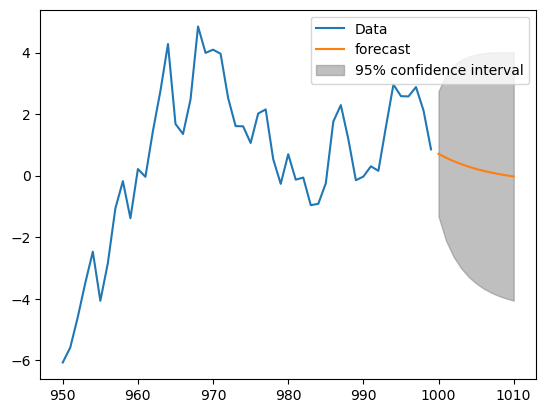

In [63]:
# Importamos ARIMA plot_predict de statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast fuera de la muestra
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

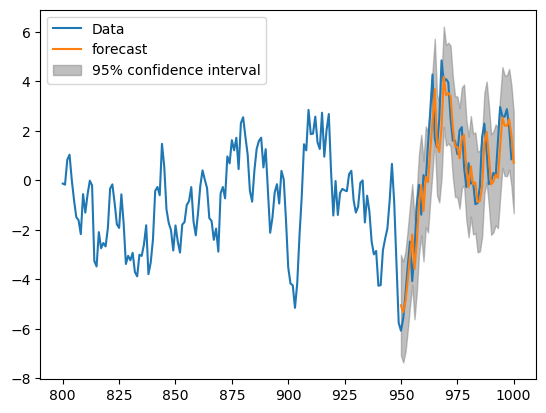

In [64]:
# Importamos ARIMA plot_predict de statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast dentro de la muestra
fig, ax = plt.subplots()
simulated_data_1.loc[800:].plot(ax=ax)
plot_predict(res, start=950, end=1000, ax=ax)
plt.show()

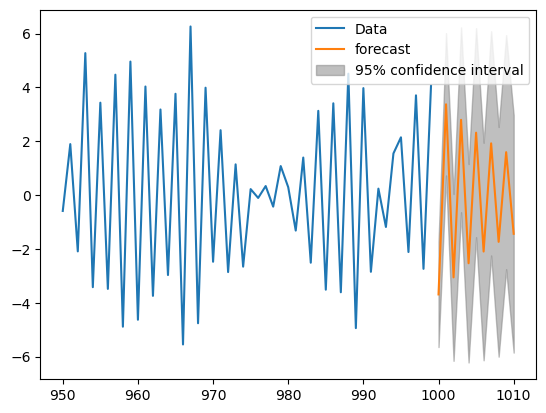

In [65]:
# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_2, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast
fig, ax = plt.subplots()
simulated_data_2.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

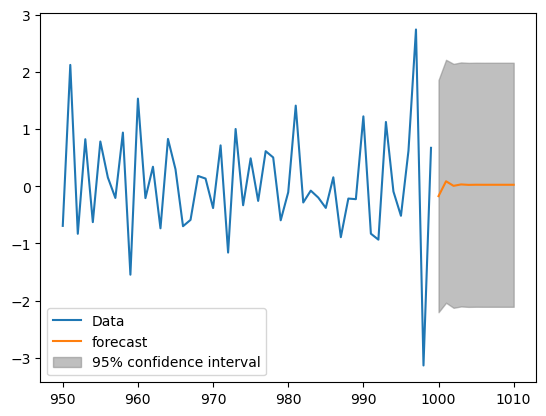

In [66]:
# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_4, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast
fig, ax = plt.subplots()
simulated_data_4.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

## <a id='4.4.'> 4.4. Estimar el orden de un proceso AR: PACF </a>
Una herramienta para determinar el orden de un modelo autoregresivo (AR) es analizar la Función de Autocorrelación Parcial (PACF). En este ejercicio, se generarán dos series temporales simuladas, una con un proceso AR(1) y otra con un proceso AR(2), y se calculará la PACF muestral para cada una de ellas. Se podrá observar que en el caso de un modelo AR(1), la PACF debe mostrar un valor significativo en el retraso 1 y aproximadamente valores cercanos a cero para los retrasos posteriores. En el caso de un modelo AR(2), la PACF muestral debe revelar valores significativos en los retrasos 1 y 2, seguidos de valores cercanos a cero en los retrasos posteriores.

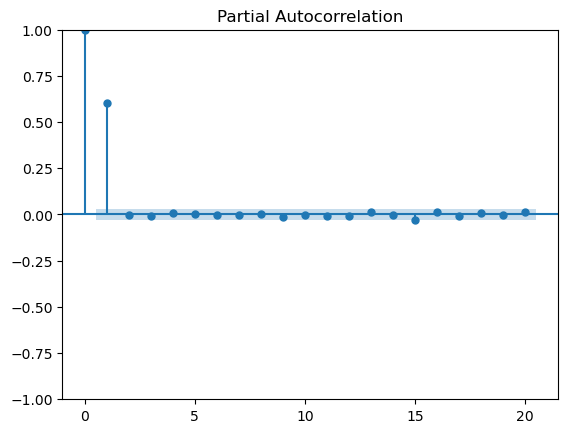

In [67]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulamos un AR(1) con phi=+0.6
ar = np.array([1, -0.6])
ma = np.array([1])
Ar_object = ArmaProcess(ar, ma)
simulated_data_1 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_pacf(simulated_data_1, lags = 20, alpha = 0.05)
plt.show()

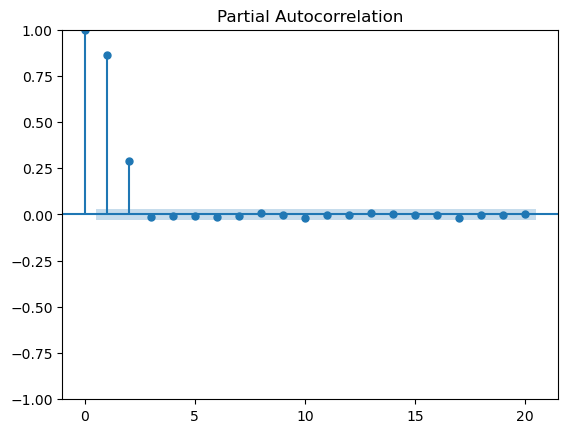

In [68]:
# Simulamos un AR(2) para phi1=+0.4, phi2=+0.3, phi3=+0.1
ar = np.array([1, -0.6, -0.3])
ma = np.array([1])
Ar_object = ArmaProcess(ar, ma)
simulated_data_2 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para AR(2)
plot_pacf(simulated_data_2, lags = 20)
plt.show()

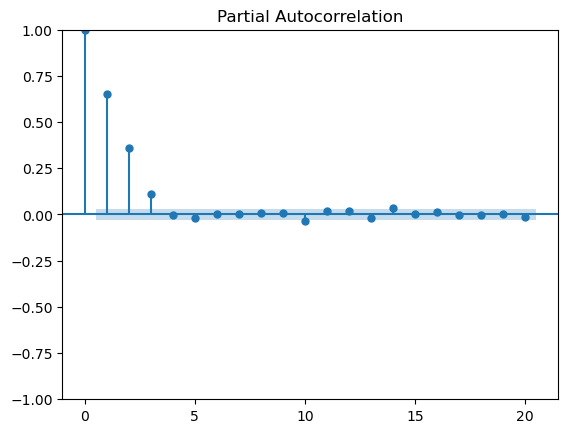

In [69]:
# Simulamos un AR(3) para phi1=+0.4, phi2=+0.3, phi3=+0.1
ar = np.array([1, -0.4, -0.3, -0.1])
ma = np.array([1])
Ar_object = ArmaProcess(ar, ma)
simulated_data_3 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para AR(3)
plot_pacf(simulated_data_3, lags = 20)
plt.show()

## <a id='4.5.'> 4.5. Estimar el orden de un proceso AR: Criterios de información </a>
Otra herramienta para identificar el orden de un modelo es observar el Criterio de Información de Akaike (AIC) y el Criterio de Información Bayesiano (BIC). Estas medidas calculan la bondad del ajuste con los parámetros estimados, pero aplican una función de penalización sobre el número de parámetros del modelo.
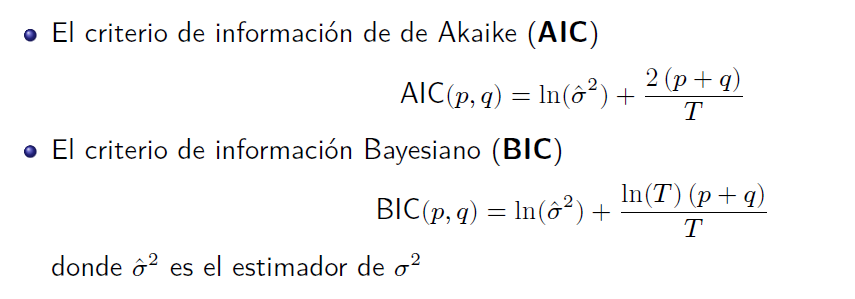

In [70]:
from statsmodels.tsa.arima.model import ARIMA

BIC = np.zeros(7)
AIC = np.zeros(7)
HQIC = np.zeros(7)

# Fiteamos los data para un AR(p) para p = 0,...,6 , y lo guardamos en el BIC, AIC y HQIC
for p in range(7):
    mod = ARIMA(simulated_data_2, order = (p, 0, 0)) # Usamos el AR(3)
    res = mod.fit()
    # Save BIC for AR(p)    
    BIC[p] = res.bic
    AIC[p] = res.aic
    HQIC[p] = res.hqic


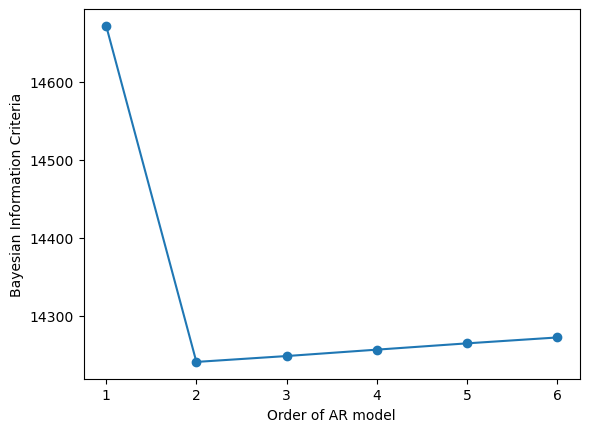

In [71]:
# Graficamos el criterio de información BIC
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

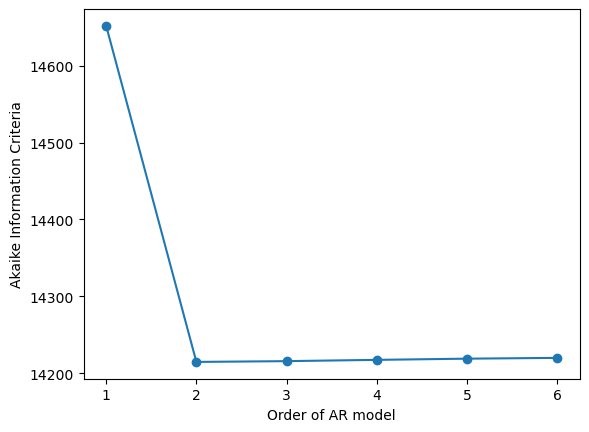

In [72]:
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criteria')
plt.show()

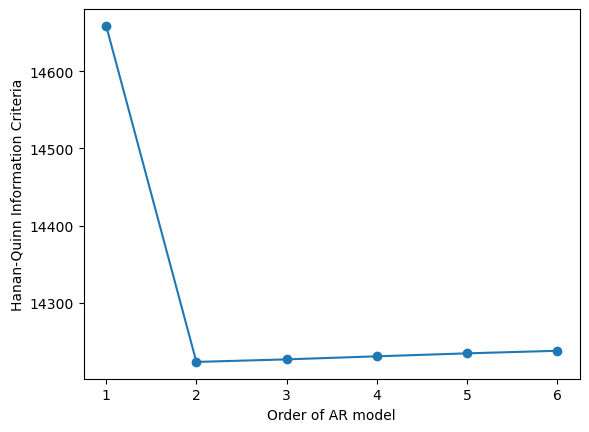

In [73]:
plt.plot(range(1,7), HQIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Hanan-Quinn Information Criteria')
plt.show()

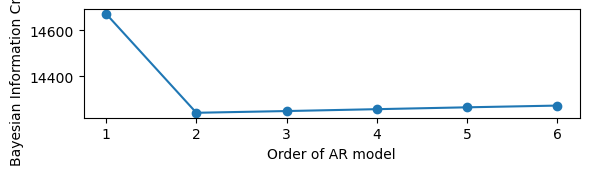

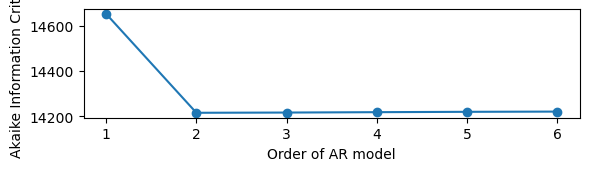

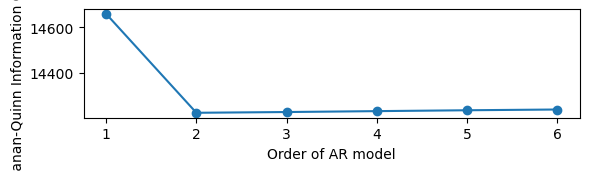

In [74]:
# Graficamos los 3 criterios de información
plt.subplot(3,1,1)
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

plt.subplot(3,1,2)
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criteria')
plt.show()

plt.subplot(3,1,3)
plt.plot(range(1,7), HQIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Hanan-Quinn Information Criteria')
plt.show()

# <a id='5.'> 5. Modelos MA y ARMA </a>

## <a id='5.1.'> 5.1. Procesos moving average (MA) </a>
Una serie promedio móvil o moving average se refiere a aquella en la que cada valor en la serie temporal es el resultado de una combinación lineal de valores de error anteriores. En otras palabras, el valor actual de la serie se calcula como una suma ponderada de los errores de predicción anteriores.

Sea un MA(1):
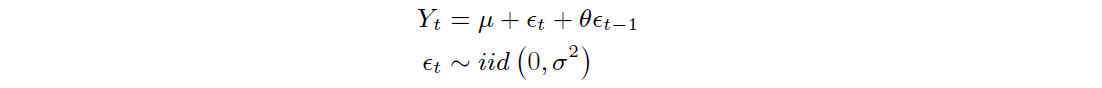
tal que
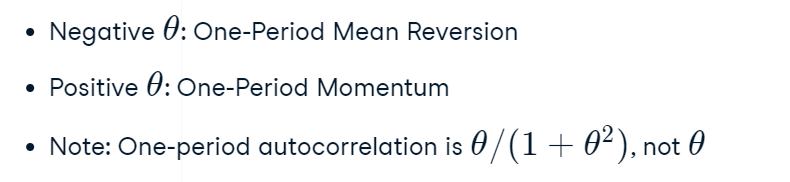

Podemos comparar las ACFs para distintos valores de $\theta$
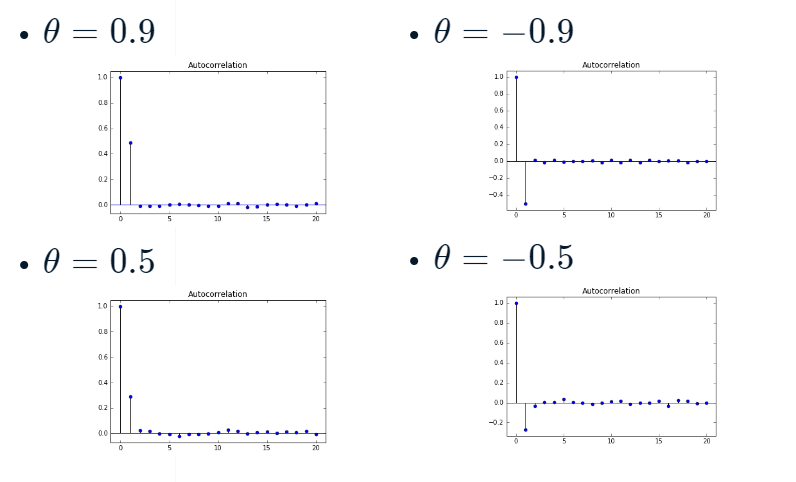

Asimismo, los modelos $MA(q)$ de mayor orden $q$ vendrían representados por:
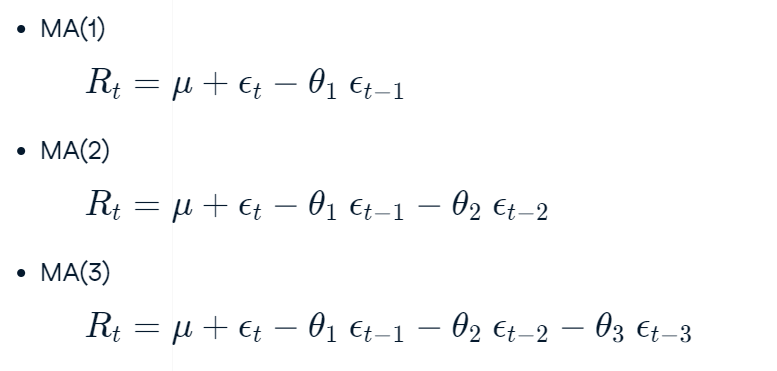
y en general
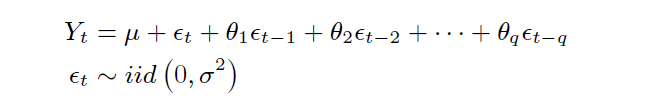

### Simulación de series temporales MA(1)
Simularemos y trazaremos algunas series temporales MA(1), cada una con un parámetro diferente, utilizando el módulo arima_process de statsmodels. Importamos ArmaProcess y le añadimos dos arrays, uno con el componente AR y otro con el componente MA

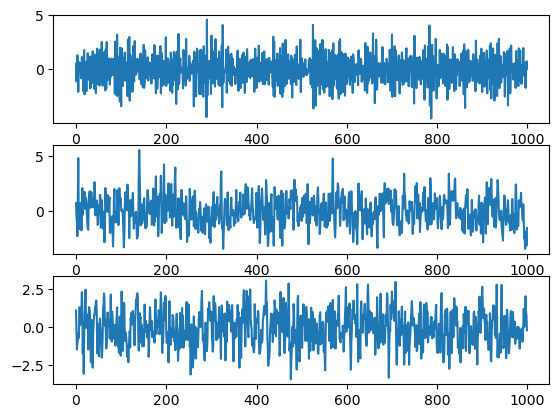

In [75]:
# Plot 1: MA parameter = -0.9
plt.subplot(3, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
Arma_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = Arma_object1.generate_sample(nsample = 1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(3, 1 , 2)
ar2 = np.array([1])
ma2 = np.array([1, +0.9])
Arma_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = Arma_object2.generate_sample(nsample = 1000)
plt.plot(simulated_data_2)


# Plot 2: MA parameter = +0.5
plt.subplot(3, 1 , 3)
ar3 = np.array([1])
ma3 = np.array([1, +0.5])
Arma_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = Arma_object3.generate_sample(nsample = 1000)
plt.plot(simulated_data_3)

### Comparar el PACF de los procesos AR

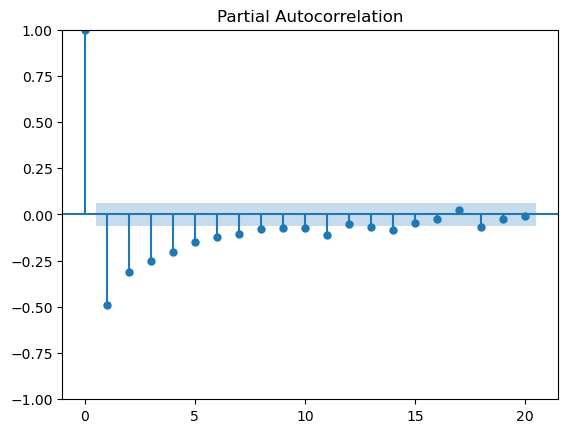

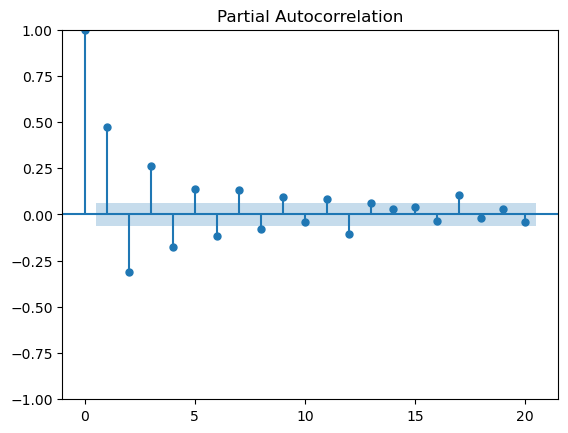

In [76]:
# Plot 1: MA parameter = -0.9
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Plot 2: MA parameter = 0.9
plot_pacf(simulated_data_2, lags = 20)
plt.show()

## <a id='5.2.'> 5.2. Estimación de procesos moving average (MA) </a>

In [77]:
# Importar el módulo ARIMA de statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo MA(1) a los primeros datos simulados
mod = ARIMA(simulated_data_1, order = (0, 0, 1))
res = mod.fit()

# Imprimir información resumida sobre el ajuste
print(res.summary())

# Imprimir la estimación de la constante y de theta
print("Cuando theta verdadero=-0.9, la estimación de theta es:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1403.379
Date:                Wed, 25 Oct 2023   AIC                           2812.758
Time:                        19:37:50   BIC                           2827.482
Sample:                             0   HQIC                          2818.354
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.003     -0.065      0.948      -0.005       0.005
ma.L1         -0.9143      0.013    -70.883      0.000      -0.940      -0.889
sigma2         0.9676      0.045     21.497      0.0

In [78]:
# Ajustar un modelo MA(1) a los primeros datos simulados
mod = ARIMA(simulated_data_2, order = (0, 0, 1))
res = mod.fit()

# Imprimir información resumida sobre el ajuste
print(res.summary())

# Imprimir la estimación de la constante y de theta
print("Cuando theta verdadero=0.9, la estimación de theta es:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1417.093
Date:                Wed, 25 Oct 2023   AIC                           2840.185
Time:                        19:37:50   BIC                           2854.908
Sample:                             0   HQIC                          2845.781
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0375      0.060      0.627      0.531      -0.080       0.155
ma.L1          0.8902      0.014     63.352      0.000       0.863       0.918
sigma2         0.9947      0.043     23.368      0.0

In [79]:
# Ajustar un modelo MA(1) a los primeros datos simulados
mod = ARIMA(simulated_data_3, order = (0, 0, 1))
res = mod.fit()

# Imprimir información resumida sobre el ajuste
print(res.summary())

# Imprimir la estimación de la constante y de theta
print("Cuando theta verdadero=0.5, la estimación de theta es:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1411.071
Date:                Wed, 25 Oct 2023   AIC                           2828.142
Time:                        19:37:50   BIC                           2842.865
Sample:                             0   HQIC                          2833.738
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0384      0.047     -0.809      0.419      -0.132       0.055
ma.L1          0.5068      0.027     18.867      0.000       0.454       0.559
sigma2         0.9841      0.046     21.267      0.0

## <a id='5.3.'> 5.3. Pronóstico de procesos moving average (MA) </a>
Al igual que hicimos con los modelos AR, se pueden utilizar los modelos MA para pronosticar datos dentro y fuera de la muestra utilizando la función plot_predict() en statsmodels.

In [80]:
# Primero transformamos a dataframes los arrays de las variables simuladas
simulated_data_1 = pd.DataFrame(simulated_data_1)
simulated_data_1.columns = ['Data']

simulated_data_2 = pd.DataFrame(simulated_data_2)
simulated_data_2.columns = ['Data']

simulated_data_3 = pd.DataFrame(simulated_data_3)
simulated_data_3.columns = ['Data']

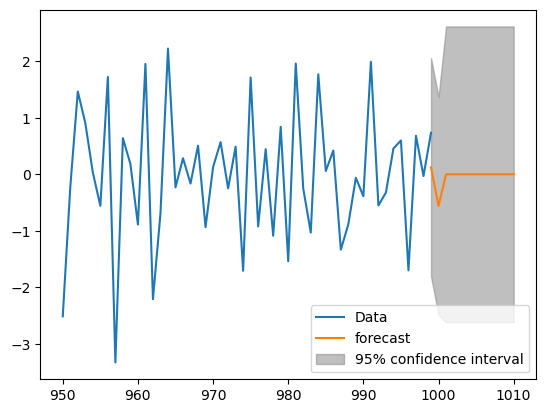

In [81]:
# Forecast del modelo MA(1)
mod = ARIMA(simulated_data_1, order = (0, 0, 1))
res = mod.fit()

# Graficamos la data y el forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 999 , end = 1010 , ax=ax)
plt.show()

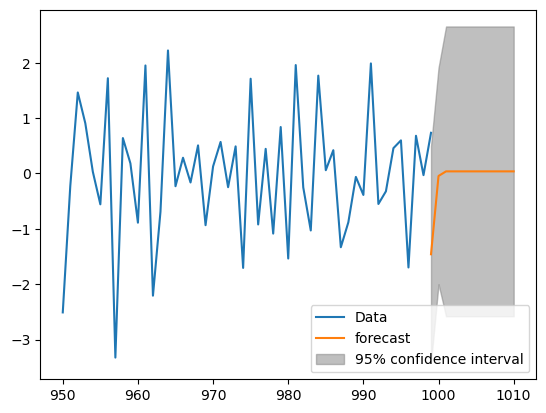

In [82]:
# Forecast del modelo MA(1)
mod = ARIMA(simulated_data_2, order = (0, 0, 1))
res = mod.fit()

# Graficamos la data y el forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 999 , end = 1010 , ax=ax)
plt.show()

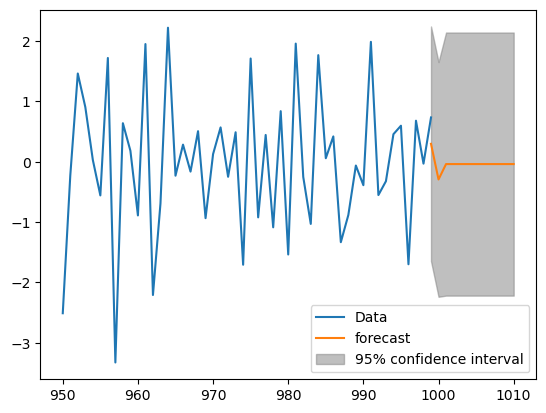

In [83]:
# Forecast del modelo MA(1)
mod = ARIMA(simulated_data_3, order = (0, 0, 1))
res = mod.fit()

# Graficamos la data y el forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 999 , end = 1010 , ax=ax)
plt.show()

## <a id='5.4.'> 5.4 Estimar el orden de un proceso MA: ACF </a>

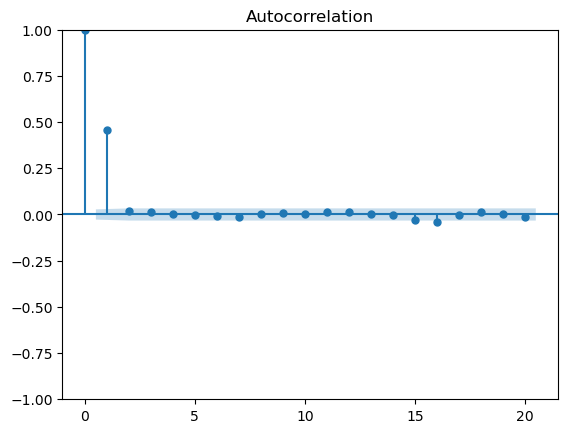

In [84]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Simulamos un MA(1) con theta=+0.6
ar = np.array([1])
ma = np.array([1, +0.6])
Ar_object = ArmaProcess(ar, ma)
simulated_data_1 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_acf(simulated_data_1, lags = 20, alpha = 0.05)
plt.show()

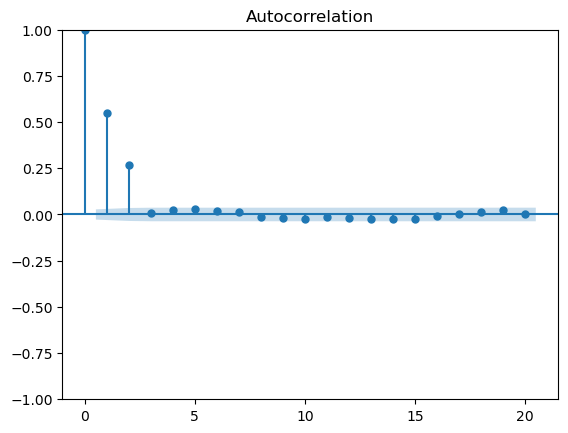

In [85]:
# Simulamos un MA(2) con theta=+0.6, theta=+0.4
ar = np.array([1])
ma = np.array([1, +0.6, +0.4])
Ar_object = ArmaProcess(ar, ma)
simulated_data_2 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_acf(simulated_data_2, lags = 20, alpha = 0.05)
plt.show()

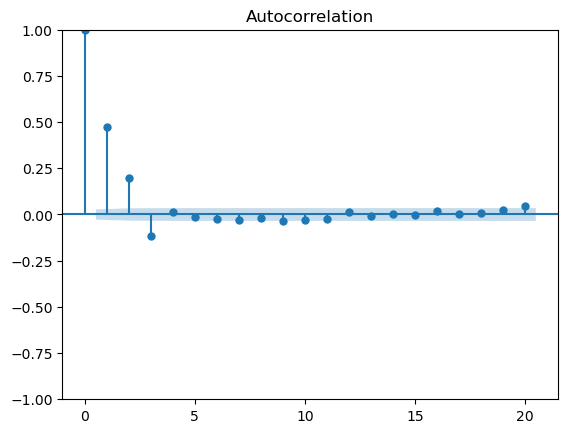

In [86]:
# Simulamos un MA(3) con theta=+0.6, theta=+0.4, theta=-0.2
ar = np.array([1])
ma = np.array([1, +0.6, +0.4, -0.2])
Ar_object = ArmaProcess(ar, ma)
simulated_data_3 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_acf(simulated_data_3, lags = 20, alpha = 0.05)
plt.show()

## <a id='5.5.'> 5.5 Estimar el orden de un proceso MA: Criterios de información </a>

In [87]:
from statsmodels.tsa.arima.model import ARIMA

BIC = np.zeros(7)
AIC = np.zeros(7)
HQIC = np.zeros(7)

# Fiteamos los data para un AR(p) para p = 0,...,6 , y lo guardamos en el BIC, AIC y HQIC
for q in range(7):
    mod = ARIMA(simulated_data_3, order = (0, 0, q)) # Usamos el AR(3)
    res = mod.fit()
    # Guardamos el criterio de información para el MA(q)
    BIC[q] = res.bic
    AIC[q] = res.aic
    HQIC[q] = res.hqic

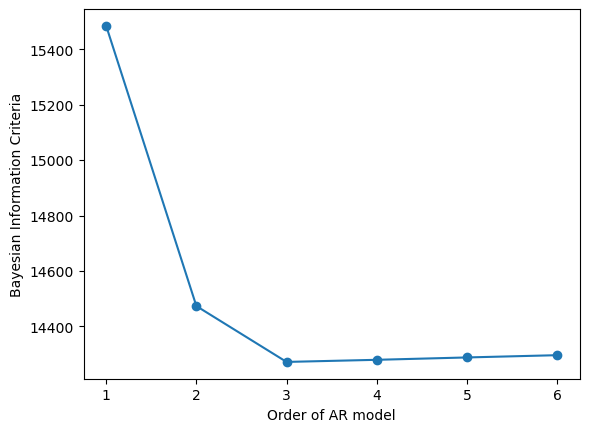

In [88]:
# Graficamos el criterio de información BIC
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

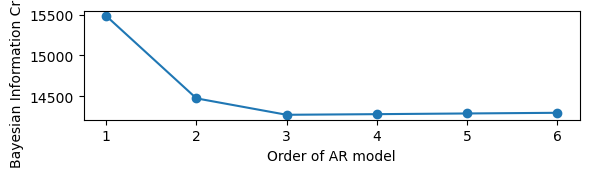

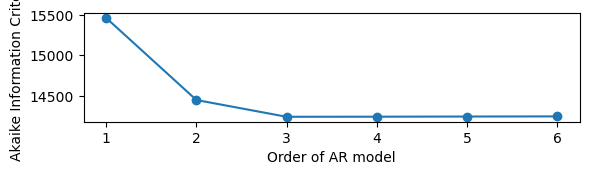

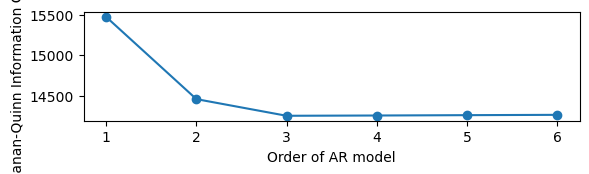

In [89]:
# Graficamos los 3 criterios de información
plt.subplot(3,1,1)
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

plt.subplot(3,1,2)
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criteria')
plt.show()

plt.subplot(3,1,3)
plt.plot(range(1,7), HQIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Hanan-Quinn Information Criteria')
plt.show()

## <a id='5.6.'> 5.6. Equivalencia de un AR(1) con un MA($\infty$) </a>

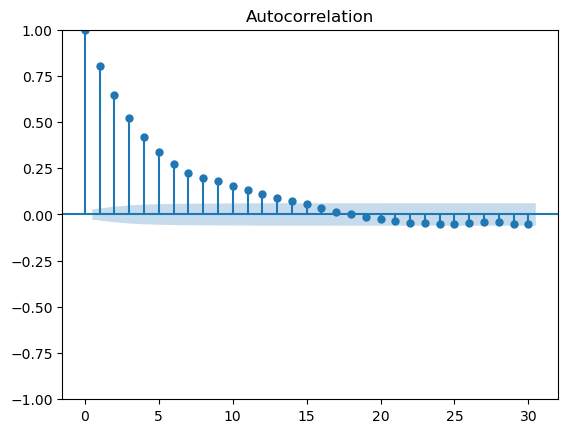

In [90]:
# Importar los módulos para simular datos y graficar la ACF (Función de Autocorrelación)
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Construir una lista de parámetros MA 
ma = [.8**i for i in range(30)]

# Simular el modelo MA(30)
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Graficar la ACF 
plot_acf(simulated_data, lags=30)
plt.show()


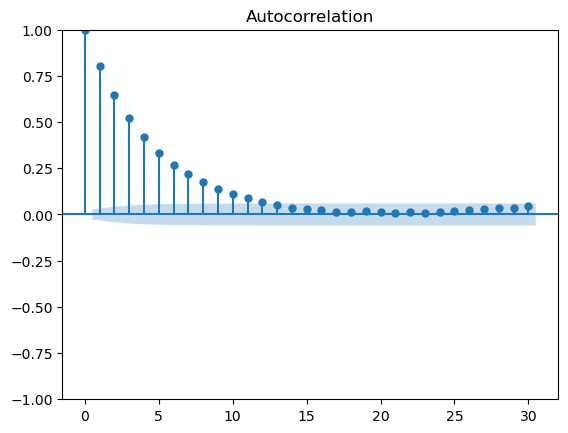

In [91]:
# Simular el modelo AR(1) con phi=+0.8
ma = np.array([1])
ar = np.array([1, -0.8])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Graficar la ACF 
plot_acf(simulated_data, lags=30)
plt.show()